<a href="https://colab.research.google.com/github/harnalashok/databases/blob/main/8_Database_normalization_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 24th June, 2024
# Objective: Bottom-up approach to data modeling

# Database normalization from scratch
Refer this [link](http://phlonx.com/resources/nf3/)

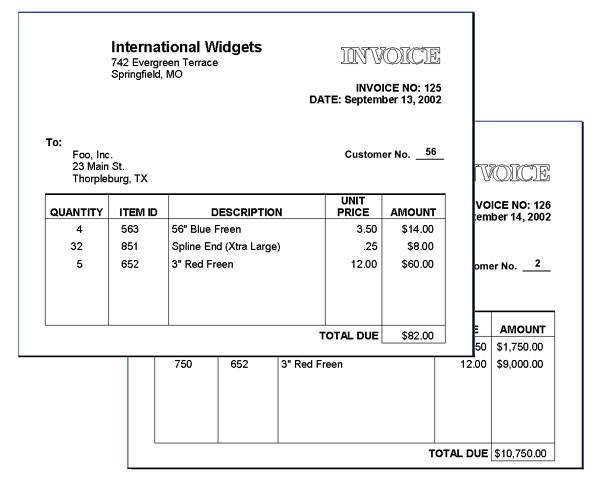

Let us capture the above information in a tabular form.

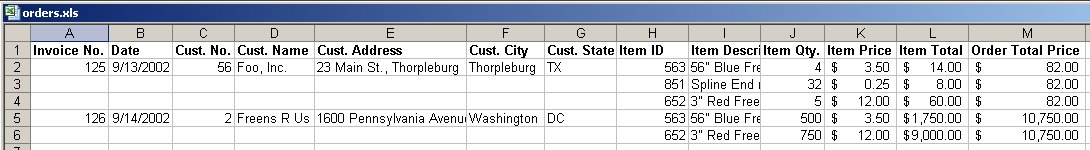

## First Normal Form: No nested tables or Groups of Elements


In no cell we should be having multiple elements or a table.

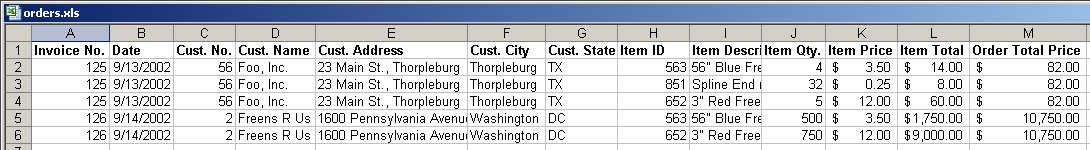

###Define primay key
Before we proceed further, we need to specify our primary key. Each row has an order_id for every item_id. Therefore, Primry Key: [*order_id,item_id*]. It is a composite primary key.

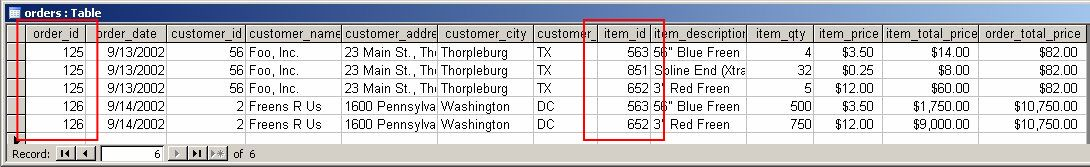

The underlying structure of the orders table can be represented as in the figure below. We identify the columns that make up the primary key with the PK notation. The following figure is also the beginning of our Entity Relationship Diagram (or ERD).

Our database schema now satisfies the two requirements of First Normal Form: atomicity and uniqueness. Thus it fulfills the most basic criterion of a relational database.

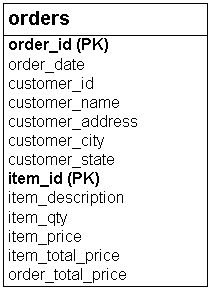

## Second Normal Form: No Dependencies on a part of a Composite Primary Key

Next, we test each field for partial dependencies on the composite PK. This means that for a table that has a composite primary key, each column in the table that is not part of the primary key must depend upon the entire composite PK for its existence. If any column only depends upon one part of the composite key, then we say that the entire table has failed Second Normal Form and we must create another table to rectify the failure.

Here is a field-by-field description:
* *order_date* depends only on *order_id*
* *customer_id* depends neither on *order_id* nor on *item_id*.
* Same logic as above applies to *customer_name*, *customer_address*, *customer_city* and *customer_state*  
* *item_description* depends only on *item_id*
* *item_price* also depends only on *item_id*
* *item_qty* depends on both *order_id* and *item_id*
* *item_total_price* and *order_total_price* are derived fields


On *item_price *

A common-sense thing to do would be to regard the item price as dependent on both the item and the order. Whether this solution is appropriate or not would depend on the needs of the business you are modelling. The point is that this is not a question that can be addressed by the Normalization process alone; once again, we have a matter that falls under the discussion of business rules. For the sake of simplicity we have chosen to create this tutorial in a world where prices never change, and within this static and rarified world, *item_price* fails Second Normal Form.

customer_id  
*customer_id* is the ID number of the customer who placed the order. Does it rely on *order_id*? No: a customer can exist without placing any orders. Does it rely on *item_id*? No: for the same reason. This is interesting: customer_id (along with the rest of the customer_ columns) does not rely on either member of the primary key.   

At the same time *order_id* and *order_date* are meaningless without *customer_id*.

*item_total_price*  
*item_total_price* is another tricky one, but for a different reason. On the one hand, it seems to depend on both *order_id* and *item_id*, in which case it passes Second Normal Form. On the other hand, it is a derived value: it is merely the product of *item_qty* and *item_price*. What to do with this field?

In fact, this field <u>does not belong in our database at all</u>. It can easily be reconstructed outside of the database proper; to include it would be redundant (and could quite possibly introduce corruption). Therefore we will discard it and speak of it no more.  

*order_total_price*, the sum of all the item_total_price fields for a particular order, is another derived value. We discard this field too.

Here is the markup from our NF2 analysis of the orders table

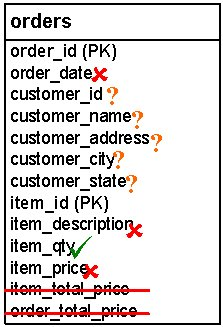

What do we do with a table that fails Second Normal Form, as this one has? First we take out the second half of the composite primary key (*item_id*) and put it in its own table.

All the columns that depend on *item_id* - whether in whole or in part - follow it into the new table. We call this new table *order_items*.

The other fields - those that rely on just the first half of the primary key (*order_id*) and those we aren't sure about - stay where they are.

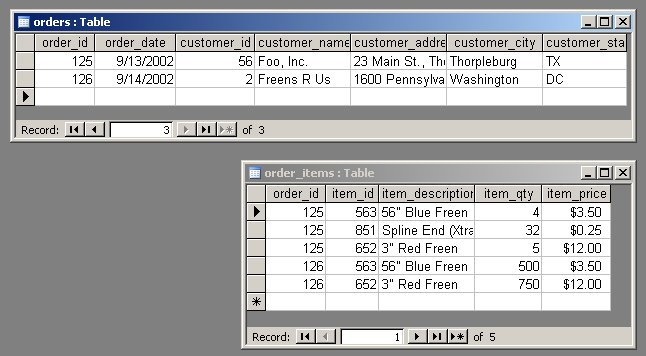

There are several things to notice:
1. We have brought a copy of the *order_id* column over into the *order_items* table. This allows each *order_item* to "remember" which order it is a part of.
2. The orders table has fewer rows than it did before.
3. The orders table no longer has a composite primary key.
4. The primary key now consists of a single column, *order_id*.
5. The *order_items* table does have a composite primary key.

A revised ER diagram

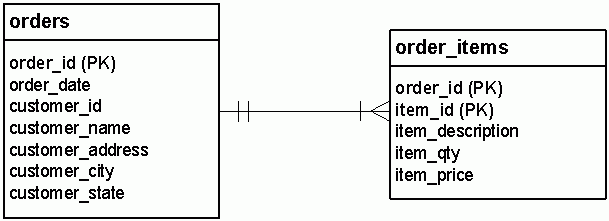

### Second normal form again

Remember, <u>NF2 only applies to tables with a composite</u> primary key. Now that orders has a single-column primary key, it has passed Second Normal Form.

*order_items*, however, still has a composite primary key. We have to pass it through the NF2 analysis again, and see if it measures up. We ask the same question we did before:

Can this column exist without one or the other part of the composite primary key?

*item_description* relies only on *item_id*, but not *order_id*. So (surprise), this column once again fails NF2.

*item_qty* relies on both members of the primary key. It does not violate NF2.

*item_price* relies on the item_id but not on the order_id, so it does violate Second Normal Form.

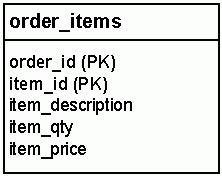

<br><br><br>
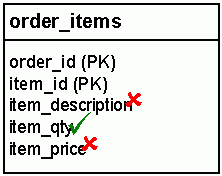

Take the fields that fail NF2, and create a new table. We call this new table items.

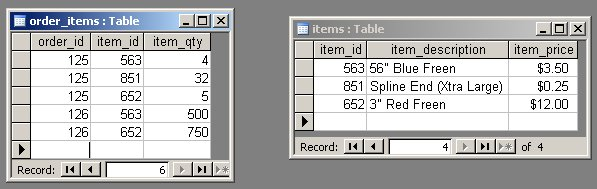

And here is our revised ERD. In revised ERD, *item_id* in order_items table is a Foreign Key. *item_id* is a PK in items table.

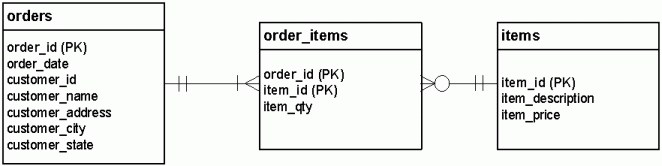

## Third Normal Form: No Dependencies on Non-Key Attributes

Fields, *customer_name, customer_address, customer_city*, and *customer_state* actually rely on *customer_id* which is <u>not a part of Primary Key</u> in this table (it is a non-key attribute).

These fields belong in their own table, with *customer_id* as the primary key. We, therefore, create a separate table for customers. Here is the revised ERD.

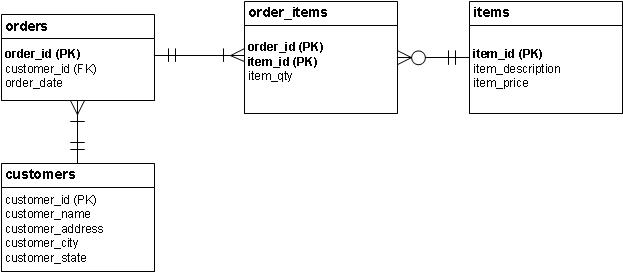

And this is the final set of tables.

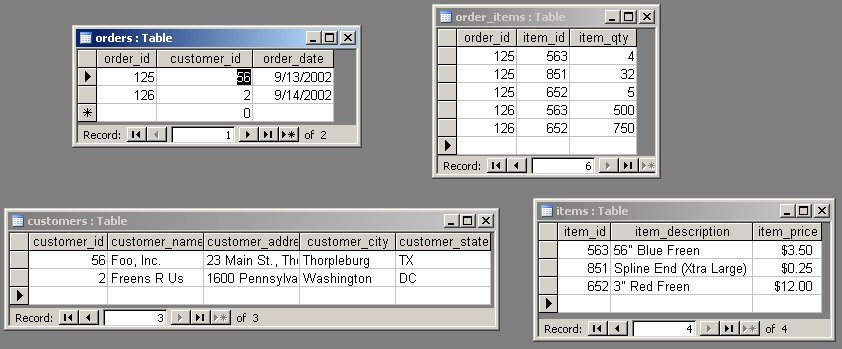

In [ ]:
########### Done ###########